In [1]:
from keras.datasets import boston_housing

(X_train,y_train),(X_test,y_test) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 0us/step


In [2]:
print(X_train.shape)
print(X_test.shape)


(404, 13)
(102, 13)


In [0]:
#Normalizing Data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_normalized= scaler.fit_transform(X_train)

X_test_normalized = scaler.transform(X_test)


In [4]:
X_train_normalized[1]

array([-0.40342651,  2.99178419, -1.33391162, -0.25683275, -1.21518188,
        1.89434613, -1.91036058,  1.24758524, -0.85646254, -0.34843254,
       -1.71818909,  0.43190599, -1.32920239])

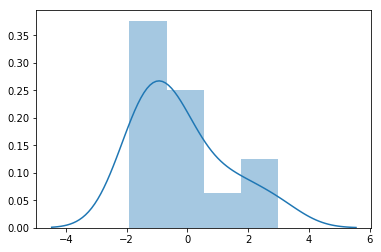

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.distplot(X_train_normalized[1])

In [6]:
X_train_normalized.shape[1]

13

In [0]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64,activation="relu",
                        input_shape=(X_train_normalized.shape[1],)))
  model.add(layers.Dense(64,activation="relu"))
  model.add(layers.Dense(1))
  model.compile(optimizer= "rmsprop", loss= "mse", metrics = ["mae"])
  return model


In [33]:
###CROSS VALALIDATION

import numpy as np

k=4
num_val_samples= len(X_train_normalized) // k
num_epochs = 100
all_mae_histories=[]

for i in range(k):
  print('processing fold #',i)
  
  val_data = X_train_normalized[i * num_val_samples : (i+1) * num_val_samples]
  
  val_targets = y_train[i * num_val_samples : (i+1) * num_val_samples]
  
  partial_train_data = np.concatenate([X_train_normalized[:i * num_val_samples],
                                     X_train_normalized[(i+1) * num_val_samples:]],
                                      axis=0)
  partial_train_targets = np.concatenate([y_train[:i * num_val_samples],
                                     y_train[(i+1) * num_val_samples:]],
                                     axis=0)
  
  model=build_model()
  
  history=model.fit(partial_train_data,
            partial_train_targets,
            epochs=num_epochs,
            batch_size=1,
            verbose=0,
            validation_data= (val_data,val_targets))
  
  print(history.history.keys())
  
  mae_history= history.history["val_mean_absolute_error"]
  all_mae_histories.append(mae_history)

processing fold # 0
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])
processing fold # 1
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])
processing fold # 2
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])
processing fold # 3
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


In [0]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

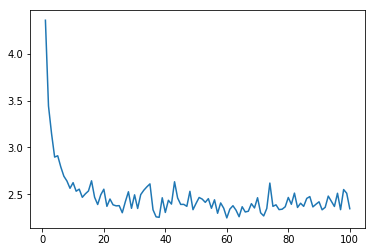

In [35]:
import matplotlib.pyplot as plt

plt.plot(range(1,len(average_mae_history) +1),average_mae_history)
plt.xlabel=("Epochs")
plt.xlabel=("Validation MAE")
plt.show()

In [46]:
model=build_model()
  
model.fit(X_train_normalized,
          y_train,
          epochs=80, # THe optimized value
          batch_size=16)

test_mse_score, test_mae_score = model.evaluate(X_test_normalized,y_test)

Epoch 1/80
404/404 [==============================] - 2s 5ms/step - loss: 517.6002 - mean_absolute_error: 20.7710
Epoch 2/80
404/404 [==============================] - 0s 258us/step - loss: 364.2758 - mean_absolute_error: 16.8576
Epoch 3/80
404/404 [==============================] - 0s 247us/step - loss: 197.0077 - mean_absolute_error: 11.6874
Epoch 4/80
404/404 [==============================] - 0s 227us/step - loss: 95.3732 - mean_absolute_error: 7.5896
Epoch 5/80
404/404 [==============================] - 0s 242us/step - loss: 52.4514 - mean_absolute_error: 5.5801
Epoch 6/80
404/404 [==============================] - 0s 264us/step - loss: 33.7528 - mean_absolute_error: 4.2910
Epoch 7/80
404/404 [==============================] - 0s 256us/step - loss: 25.9566 - mean_absolute_error: 3.6745
Epoch 8/80
404/404 [==============================] - 0s 275us/step - loss: 22.3528 - mean_absolute_error: 3.3090
Epoch 9/80
404/404 [==============================] - 0s 263us/step - loss: 20.0267 

In [47]:
test_mae_score # OFF by about 2560 dollars

2.5644297225802553

In [54]:
import math  
math.sqrt(test_mse_score)

4.014114441528051

In [0]:
#RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable.